In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

os.environ["TMPDIR"] = "/disk/scratch/mhennig/tmp"
os.environ["TEMPDIR"] = "/disk/scratch/mhennig/tmp"
os.environ['KBUCKET_CACHE_DIR'] = '/disk/scratch/mhennig/sha1-cache-mhennig'
os.putenv('KBUCKET_CACHE_DIR', '/disk/scratch/mhennig/sha1-cache-mhennig')
os.environ['KACHERY_STORAGE_DIR'] = '/disk/scratch/mhennig/sha1-cache-mhennig'
os.environ["KILOSORT2_PATH"] = "/disk/scratch/mhennig/spikeinterface/Kilosort2/"
os.environ["NPY_MATLAB_PATH"] = "/disk/scratch/mhennig/spikeinterface/npy-matlab/"
os.environ["IRONCLUST_PATH"] = "/disk/scratch/mhennig/spikeinterface/ironclust"
sys.path.insert(0, '../../spikeinterface/spikeextractors/')
sys.path.insert(0, '../../spikeinterface/spiketoolkit/')
sys.path.insert(0, '../../spikeinterface/spikesorters/')
sys.path.insert(0, '../../spikeinterface/spikewidgets/')
sys.path.insert(0, '../../spikeinterface/spikemetrics/')
sys.path.insert(0, '../../spikeinterface/spikecomparison/')

from pathlib import Path

# conda install -c jaikumarm hyperopt
import bayesianoptimization as b
import tpeoptimization as t
from hyperopt import hp

import matplotlib.pyplot as plt

import spikeextractors as se
import spikesorters as ss
import spikecomparison as sc
import shutil

import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Could not load plane information. Assuming probe is in yz plane


(-74.25985663082436, 74.25985663082437, -74.26517660044149, 74.2651766004415)

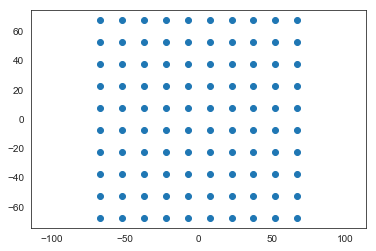

In [2]:
# # SYNTH_VISAPY
# # mea_c30 set 1
# recdir = 'sha1dir://ed0fe4de4ef2c54b7c9de420c87f9df200721b24.synth_visapy/mea_c30/set1'

# #synth_bionet_static static_8x_A_2A
# # recdir = 'sha1dir://abc900f5cd62436e7c89d914c9f36dcd7fcca0e7.synth_bionet/bionet_static/static_8x_A_2A'

# # synth_magland_noise10_K10_C4
# # tetrode
# # recdir = 'sha1dir://fb52d510d2543634e247e0d2d1d4390be9ed9e20.synth_magland/datasets_noise10_K10_C4/001_synth'

# print('Load recording...')
# recording = SFMdaRecordingExtractor(dataset_directory=recdir, download=True)
# sorting_true = SFMdaSortingExtractor(firings_file=recdir + '/firings_true.mda')


p = Path('/disk/scratch/mhennig/spikeinterface/paper/MEArec/')
study_folder = p / 'study_mearec_SqMEA1015um_2/'
mearec_filename = p / 'recordings_50cells_SqMEA-10-15um_60.0_10.0uV_27-03-2019_13-31-005.h5'
sorting_true = se.MEArecSortingExtractor(mearec_filename)
recording = se.MEArecRecordingExtractor(mearec_filename)

cl=np.array(recording.get_channel_locations(recording.get_channel_ids()))
plt.figure()
plt.scatter(cl[:,0], cl[:,1])
plt.axis('equal')


In [3]:


sorter = 'herdingspikes'

space = {'clustering_bandwidth': hp.uniform('clustering_bandwidth', 3, 16),
    'clustering_alpha': hp.uniform('clustering_alpha', 3, 16),
    'detection_threshold': hp.qnormal('detection_threshold', 30, 10, 1),
#     'ahpthr': hp.quniform('ahpthr', -30, 30, 1),
#     'probe_inner_radius':hp.quniform('probe_inner_radius',60,100,1),
#          'probe_neighbor_radius':hp.quniform('probe_neighbor_radius',70,120,1),
#          'probe_event_length':hp.uniform('probe_event_length',0.1,0.3),
#     'maa': hp.quniform('maa',0,10,1)
#     'pca_ncomponents': hp.quniform('pca_ncomponents', 1, 5, 1),
#          'filter':hp.choice('filter',['True','False']),
#          'pre_scale_value': hp.uniform('pre_scale_value',20,25)
        }

params = {     'clustering_bandwidth': (3., 16.),
                'clustering_alpha': (3., 16.),
               'detection_threshold': (10, 30),
#               'probe_inner_radius': (60,100),
#              'probe_neighbor_radius': (70,120),
#               'probe_event_length': (0.1,0.3),
#              'ahpthr': (-30, 30),
#              'maa': (0,10)
#               'pca_ncomponents': (1, 4),
#            'pre_scale_value':(20.,21.),
#           'filter':(['True','False'])
                       } 


In [6]:
test = b.BayesianOptimization(sorter=sorter, recording=recording, gt_sorting=sorting_true, params_to_opt=params, 
                              run_schedule=[30, 30],
                              metric ='accuracy', outfile = 'res')

# test = t.TPEOptimization(sorter=sorter, recording=recording, gt_sorting=sorting_true, params_to_opt=params, 
#                               space=space, run_schedule=[2, 2],
#                               metric ='accuracy', outfile = 'res')



In [ ]:
test.run()


Iteration No: 1 started. Evaluating function at random point.
Iteration 0
Clustering with parameters: [10.05503408676955, 11.156819504781925, 20]
Passed parameters: {'clustering_bandwidth': 10.05503408676955, 'clustering_alpha': 11.156819504781925, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 20, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90, 'probe_event_length': 0.2, 'probe_peak_jitter': 0.1, 'num_com_centers': 1, 'maa': 2, 'ahpthr': 10, 'out_file_name': 'HS2_detected', 'decay_filtering': False, 'save_all': False, 'amp_evaluation_time': 0.2, 'spk_evaluation_time': 1.4, 'pca_ncomponents': 2, 'pca_whiten': True, 'freq_min': 300.0, 'freq_max': 6000.0, 'filter': False, 'pre_scale': False, 'pre_scale_value': 20.0}
# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling r

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.6s remaining:    7.8s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.9s finished


Number of estimated units: 40
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_0/HS2_sorted.hdf5
results
{'accuracy': 0.4608330767083071, 'recall': 0.5108903563313293, 'precision': 0.4839392415712956, 'false_discovery_rate': 0.05606075842870429, 'miss_rate': 0.029109643668670748}
score:  -0.4608330767083071
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 15.4028
Function value obtained: -0.4608
Current minimum: -0.4608
Iteration No: 2 started. Evaluating function at random point.
Iteration 1
Clustering with parameters: [4.9910065395123775, 3.159106268655583, 28]
Passed parameters: {'clustering_bandwidth': 4.9910065395123775, 'clustering_alpha': 3.159106268655583, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 28, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.6s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.9s finished


Number of estimated units: 30
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_1/HS2_sorted.hdf5
results
{'accuracy': 0.4613583171215903, 'recall': 0.4787910522045813, 'precision': 0.5003847350988141, 'false_discovery_rate': 0.019615264901185828, 'miss_rate': 0.04120894779541851}
score:  -0.4613583171215903
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 15.4822
Function value obtained: -0.4614
Current minimum: -0.4614
Iteration No: 3 started. Evaluating function at random point.
Iteration 2
Clustering with parameters: [8.202827434749189, 15.671057426042921, 28]
Passed parameters: {'clustering_bandwidth': 8.202827434749189, 'clustering_alpha': 15.671057426042921, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 28, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.6s remaining:    7.8s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.0s finished


Number of estimated units: 29
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_2/HS2_sorted.hdf5
results
{'accuracy': 0.4628817588380583, 'recall': 0.48031591745188995, 'precision': 0.4987783973315761, 'false_discovery_rate': 0.021221602668423992, 'miss_rate': 0.03968408254810998}
score:  -0.4628817588380583
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 15.3958
Function value obtained: -0.4629
Current minimum: -0.4629
Iteration No: 4 started. Evaluating function at random point.
Iteration 3
Clustering with parameters: [15.478383399899533, 4.54111212921279, 18]
Passed parameters: {'clustering_bandwidth': 15.478383399899533, 'clustering_alpha': 4.54111212921279, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 18, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90,

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.5s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.8s finished


Number of estimated units: 17
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_3/HS2_sorted.hdf5
results
{'accuracy': 0.07865488458381224, 'recall': 0.10920282106114165, 'precision': 0.08644430725131125, 'false_discovery_rate': 0.033555692748688755, 'miss_rate': 0.010797178938858357}
score:  -0.07865488458381224
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 15.8866
Function value obtained: -0.0787
Current minimum: -0.4629
Iteration No: 5 started. Evaluating function at random point.
Iteration 4
Clustering with parameters: [15.177088002688304, 6.992467460204354, 25]
Passed parameters: {'clustering_bandwidth': 15.177088002688304, 'clustering_alpha': 6.992467460204354, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 25, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.4s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.9s finished


Number of estimated units: 22
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_4/HS2_sorted.hdf5
results
{'accuracy': 0.280627557697711, 'recall': 0.32936867014164106, 'precision': 0.28834176261972616, 'false_discovery_rate': 0.051658237380273836, 'miss_rate': 0.010631329858358947}
score:  -0.280627557697711
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 15.5270
Function value obtained: -0.2806
Current minimum: -0.4629
Iteration No: 6 started. Evaluating function at random point.
Iteration 5
Clustering with parameters: [4.309529620670298, 10.955511740051925, 29]
Passed parameters: {'clustering_bandwidth': 4.309529620670298, 'clustering_alpha': 10.955511740051925, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 29, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 9

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.6s remaining:    7.8s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.9s finished


Number of estimated units: 27
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_5/HS2_sorted.hdf5
results
{'accuracy': 0.4455733215019994, 'recall': 0.4622057209694652, 'precision': 0.4810537611023431, 'false_discovery_rate': 0.018946238897656974, 'miss_rate': 0.03779427903053483}
score:  -0.4455733215019994
Iteration No: 6 ended. Evaluation done at random point.
Time taken: 15.5455
Function value obtained: -0.4456
Current minimum: -0.4629
Iteration No: 7 started. Evaluating function at random point.
Iteration 6
Clustering with parameters: [3.360968434610289, 12.408986349424884, 18]
Passed parameters: {'clustering_bandwidth': 3.360968434610289, 'clustering_alpha': 12.408986349424884, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 18, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.7s remaining:    8.1s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    3.1s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.1s finished


Number of estimated units: 49
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_6/HS2_sorted.hdf5
results
{'accuracy': 0.5703052595499668, 'recall': 0.6429825401302806, 'precision': 0.6291073321626555, 'false_discovery_rate': 0.09089266783734454, 'miss_rate': 0.07701745986971938}
score:  -0.5703052595499668
Iteration No: 7 ended. Evaluation done at random point.
Time taken: 16.3464
Function value obtained: -0.5703
Current minimum: -0.5703
Iteration No: 8 started. Evaluating function at random point.
Iteration 7
Clustering with parameters: [10.905710818691373, 5.574316956742151, 19]
Passed parameters: {'clustering_bandwidth': 10.905710818691373, 'clustering_alpha': 5.574316956742151, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 19, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90,

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.6s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.9s finished


Number of estimated units: 33
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_7/HS2_sorted.hdf5
results
{'accuracy': 0.38752022531071034, 'recall': 0.4716914681780381, 'precision': 0.40567156955448624, 'false_discovery_rate': 0.09432843044551378, 'miss_rate': 0.02830853182196199}
score:  -0.38752022531071034
Iteration No: 8 ended. Evaluation done at random point.
Time taken: 15.7581
Function value obtained: -0.3875
Current minimum: -0.5703
Iteration No: 9 started. Evaluating function at random point.
Iteration 8
Clustering with parameters: [7.467062431360888, 8.750632145006835, 24]
Passed parameters: {'clustering_bandwidth': 7.467062431360888, 'clustering_alpha': 8.750632145006835, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 24, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.5s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.8s finished


Number of estimated units: 34
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_8/HS2_sorted.hdf5
results
{'accuracy': 0.49621581498107536, 'recall': 0.5237670565606664, 'precision': 0.5290131965047055, 'false_discovery_rate': 0.030986803495294497, 'miss_rate': 0.03623294343933361}
score:  -0.49621581498107536
Iteration No: 9 ended. Evaluation done at random point.
Time taken: 15.5140
Function value obtained: -0.4962
Current minimum: -0.5703
Iteration No: 10 started. Evaluating function at random point.
Iteration 9
Clustering with parameters: [9.675165144349895, 14.219191190779801, 13]
Passed parameters: {'clustering_bandwidth': 9.675165144349895, 'clustering_alpha': 14.219191190779801, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 13, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius':

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    3.0s remaining:    9.1s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    3.4s remaining:    0.7s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.4s finished


Number of estimated units: 83
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_9/HS2_sorted.hdf5
results
{'accuracy': 0.5716303550950329, 'recall': 0.677562047252193, 'precision': 0.6148099871281633, 'false_discovery_rate': 0.12519001287183656, 'miss_rate': 0.06243795274780707}
score:  -0.5716303550950329
Iteration No: 10 ended. Evaluation done at random point.
Time taken: 17.5146
Function value obtained: -0.5716
Current minimum: -0.5716
Iteration No: 11 started. Evaluating function at random point.
Iteration 10
Clustering with parameters: [7.219296615877936, 4.854526333076677, 20]
Passed parameters: {'clustering_bandwidth': 7.219296615877936, 'clustering_alpha': 4.854526333076677, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 20, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90,

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.5s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.8s finished


Number of estimated units: 41
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_10/HS2_sorted.hdf5
results
{'accuracy': 0.4769946491855972, 'recall': 0.5269037340233406, 'precision': 0.5032428683467238, 'false_discovery_rate': 0.056757131653276206, 'miss_rate': 0.03309626597665938}
score:  -0.4769946491855972
Iteration No: 11 ended. Evaluation done at random point.
Time taken: 15.7603
Function value obtained: -0.4770
Current minimum: -0.5716
Iteration No: 12 started. Evaluating function at random point.
Iteration 11
Clustering with parameters: [8.142396361600138, 9.128493430031156, 21]
Passed parameters: {'clustering_bandwidth': 8.142396361600138, 'clustering_alpha': 9.128493430031156, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 21, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.5s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.8s finished


Number of estimated units: 40
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_11/HS2_sorted.hdf5
results
{'accuracy': 0.4930741093670121, 'recall': 0.541415413473898, 'precision': 0.5249724478671096, 'false_discovery_rate': 0.05502755213289036, 'miss_rate': 0.03858458652610203}
score:  -0.4930741093670121
Iteration No: 12 ended. Evaluation done at random point.
Time taken: 15.7197
Function value obtained: -0.4931
Current minimum: -0.5716
Iteration No: 13 started. Evaluating function at random point.
Iteration 12
Clustering with parameters: [4.43286445059208, 4.579161147835933, 21]
Passed parameters: {'clustering_bandwidth': 4.43286445059208, 'clustering_alpha': 4.579161147835933, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 21, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90, 

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.5s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.8s finished


Number of estimated units: 42
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_12/HS2_sorted.hdf5
results
{'accuracy': 0.515668656583814, 'recall': 0.5569763621922464, 'precision': 0.551483032173543, 'false_discovery_rate': 0.04851696782645698, 'miss_rate': 0.04302363780775353}
score:  -0.515668656583814
Iteration No: 13 ended. Evaluation done at random point.
Time taken: 15.6715
Function value obtained: -0.5157
Current minimum: -0.5716
Iteration No: 14 started. Evaluating function at random point.
Iteration 13
Clustering with parameters: [12.170225950752565, 5.2332341274769725, 21]
Passed parameters: {'clustering_bandwidth': 12.170225950752565, 'clustering_alpha': 5.2332341274769725, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 21, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.6s remaining:    7.7s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.8s finished


Number of estimated units: 26
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_13/HS2_sorted.hdf5
results
{'accuracy': 0.30328010977585473, 'recall': 0.36871861773619286, 'precision': 0.31084114467536755, 'false_discovery_rate': 0.06915885532463242, 'miss_rate': 0.011281382263807167}
score:  -0.30328010977585473
Iteration No: 14 ended. Evaluation done at random point.
Time taken: 15.6904
Function value obtained: -0.3033
Current minimum: -0.5716
Iteration No: 15 started. Evaluating function at random point.
Iteration 14
Clustering with parameters: [5.80566997309551, 15.272509456873145, 26]
Passed parameters: {'clustering_bandwidth': 5.80566997309551, 'clustering_alpha': 15.272509456873145, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 26, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radiu

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.6s remaining:    7.7s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.0s finished


Number of estimated units: 31
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_14/HS2_sorted.hdf5
results
{'accuracy': 0.4715837411878436, 'recall': 0.4937958890231885, 'precision': 0.49545532953808114, 'false_discovery_rate': 0.02454467046191895, 'miss_rate': 0.02620411097681141}
score:  -0.4715837411878436
Iteration No: 15 ended. Evaluation done at random point.
Time taken: 15.6518
Function value obtained: -0.4716
Current minimum: -0.5716
Iteration No: 16 started. Evaluating function at random point.
Iteration 15
Clustering with parameters: [3.3598566975369426, 12.582050820711336, 24]
Passed parameters: {'clustering_bandwidth': 3.3598566975369426, 'clustering_alpha': 12.582050820711336, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 24, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radiu

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.6s remaining:    7.8s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.0s finished


Number of estimated units: 38
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_15/HS2_sorted.hdf5
results
{'accuracy': 0.4420369345256432, 'recall': 0.4670483612918357, 'precision': 0.5093815799677813, 'false_discovery_rate': 0.030618420032218607, 'miss_rate': 0.0729516387081643}
score:  -0.4420369345256432
Iteration No: 16 ended. Evaluation done at random point.
Time taken: 15.6689
Function value obtained: -0.4420
Current minimum: -0.5716
Iteration No: 17 started. Evaluating function at random point.
Iteration 16
Clustering with parameters: [9.880197771183756, 7.808671215782071, 30]
Passed parameters: {'clustering_bandwidth': 9.880197771183756, 'clustering_alpha': 7.808671215782071, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 30, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 9

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.5s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.8s finished


Number of estimated units: 27
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_16/HS2_sorted.hdf5
results
{'accuracy': 0.4045034010438618, 'recall': 0.42417297093675155, 'precision': 0.43885755077272326, 'false_discovery_rate': 0.02114244922727663, 'miss_rate': 0.035827029063248465}
score:  -0.4045034010438618
Iteration No: 17 ended. Evaluation done at random point.
Time taken: 15.3170
Function value obtained: -0.4045
Current minimum: -0.5716
Iteration No: 18 started. Evaluating function at random point.
Iteration 17
Clustering with parameters: [9.254028090049891, 5.310750555892673, 27]
Passed parameters: {'clustering_bandwidth': 9.254028090049891, 'clustering_alpha': 5.310750555892673, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 27, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius'

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.5s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.9s finished


Number of estimated units: 26
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_17/HS2_sorted.hdf5
results
{'accuracy': 0.3940227019429186, 'recall': 0.4224876151889687, 'precision': 0.4087026408929798, 'false_discovery_rate': 0.03129735910702019, 'miss_rate': 0.017512384811031408}
score:  -0.3940227019429186
Iteration No: 18 ended. Evaluation done at random point.
Time taken: 15.4562
Function value obtained: -0.3940
Current minimum: -0.5716
Iteration No: 19 started. Evaluating function at random point.
Iteration 18
Clustering with parameters: [12.268866923728755, 3.0434113791818933, 17]
Passed parameters: {'clustering_bandwidth': 12.268866923728755, 'clustering_alpha': 3.0434113791818933, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 17, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radiu

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.6s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.8s finished


Number of estimated units: 23
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_18/HS2_sorted.hdf5
results
{'accuracy': 0.13591425937027146, 'recall': 0.18734344859413649, 'precision': 0.14323099147410098, 'false_discovery_rate': 0.056769008525899015, 'miss_rate': 0.012656551405863496}
score:  -0.13591425937027146
Iteration No: 19 ended. Evaluation done at random point.
Time taken: 16.1467
Function value obtained: -0.1359
Current minimum: -0.5716
Iteration No: 20 started. Evaluating function at random point.
Iteration 19
Clustering with parameters: [5.323186969826815, 9.247304139605351, 15]
Passed parameters: {'clustering_bandwidth': 5.323186969826815, 'clustering_alpha': 9.247304139605351, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 15, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radi

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.7s remaining:    8.2s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    3.1s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.1s finished


Number of estimated units: 67
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_19/HS2_sorted.hdf5
results
{'accuracy': 0.644764527815422, 'recall': 0.7379808346537604, 'precision': 0.705428701471279, 'false_discovery_rate': 0.11457129852872093, 'miss_rate': 0.08201916534623985}
score:  -0.644764527815422
Iteration No: 20 ended. Evaluation done at random point.
Time taken: 16.7704
Function value obtained: -0.6448
Current minimum: -0.6448
Iteration No: 21 started. Evaluating function at random point.
Iteration 20
Clustering with parameters: [4.58478481643445, 10.229249984417716, 27]
Passed parameters: {'clustering_bandwidth': 4.58478481643445, 'clustering_alpha': 10.229249984417716, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 27, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90, 

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.6s remaining:    7.7s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.9s finished


Number of estimated units: 31
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_20/HS2_sorted.hdf5
results
{'accuracy': 0.47178202873610126, 'recall': 0.4897721911391886, 'precision': 0.5001867367614448, 'false_discovery_rate': 0.019813263238555198, 'miss_rate': 0.030227808860811445}
score:  -0.47178202873610126
Iteration No: 21 ended. Evaluation done at random point.
Time taken: 15.5099
Function value obtained: -0.4718
Current minimum: -0.6448
Iteration No: 22 started. Evaluating function at random point.
Iteration 21
Clustering with parameters: [8.700707014653076, 6.638040079468304, 29]
Passed parameters: {'clustering_bandwidth': 8.700707014653076, 'clustering_alpha': 6.638040079468304, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 29, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.6s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.8s finished


Number of estimated units: 27
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_21/HS2_sorted.hdf5
results
{'accuracy': 0.41067136494340806, 'recall': 0.4318749435573068, 'precision': 0.4374348670134052, 'false_discovery_rate': 0.022565132986594735, 'miss_rate': 0.028125056442693176}
score:  -0.41067136494340806
Iteration No: 22 ended. Evaluation done at random point.
Time taken: 15.1443
Function value obtained: -0.4107
Current minimum: -0.6448
Iteration No: 23 started. Evaluating function at random point.
Iteration 22
Clustering with parameters: [4.6025466530292976, 12.364696098393525, 19]
Passed parameters: {'clustering_bandwidth': 4.6025466530292976, 'clustering_alpha': 12.364696098393525, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 19, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_ra

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.7s remaining:    8.0s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.0s finished


Number of estimated units: 48
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_22/HS2_sorted.hdf5
results
{'accuracy': 0.5524374117068919, 'recall': 0.6087893266221086, 'precision': 0.593701041517036, 'false_discovery_rate': 0.06629895848296409, 'miss_rate': 0.05121067337789149}
score:  -0.5524374117068919
Iteration No: 23 ended. Evaluation done at random point.
Time taken: 15.9991
Function value obtained: -0.5524
Current minimum: -0.6448
Iteration No: 24 started. Evaluating function at random point.
Iteration 23
Clustering with parameters: [12.622975774429044, 12.494457516237375, 10]
Passed parameters: {'clustering_bandwidth': 12.622975774429044, 'clustering_alpha': 12.494457516237375, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 10, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius'

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    6.0s remaining:   17.9s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    6.5s remaining:    1.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    7.0s finished


Number of estimated units: 43
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_23/HS2_sorted.hdf5
results
{'accuracy': 0.2793758996907209, 'recall': 0.34387353934755405, 'precision': 0.28813300119640517, 'false_discovery_rate': 0.07186699880359479, 'miss_rate': 0.016126460652445992}
score:  -0.2793758996907209
Iteration No: 24 ended. Evaluation done at random point.
Time taken: 23.0763
Function value obtained: -0.2794
Current minimum: -0.6448
Iteration No: 25 started. Evaluating function at random point.
Iteration 24
Clustering with parameters: [12.020658777429487, 13.159950688318915, 24]
Passed parameters: {'clustering_bandwidth': 12.020658777429487, 'clustering_alpha': 13.159950688318915, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 24, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_rad

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.6s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.9s finished


Number of estimated units: 30
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_24/HS2_sorted.hdf5
results
{'accuracy': 0.43494632024713925, 'recall': 0.4701392032032905, 'precision': 0.46166889190819554, 'false_discovery_rate': 0.03833110809180448, 'miss_rate': 0.029860796796709582}
score:  -0.43494632024713925
Iteration No: 25 ended. Evaluation done at random point.
Time taken: 15.6142
Function value obtained: -0.4349
Current minimum: -0.6448
Iteration No: 26 started. Evaluating function at random point.
Iteration 25
Clustering with parameters: [14.172204466238936, 9.648277272963462, 27]
Passed parameters: {'clustering_bandwidth': 14.172204466238936, 'clustering_alpha': 9.648277272963462, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 27, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radi

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.6s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.9s finished


Number of estimated units: 24
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_25/HS2_sorted.hdf5
results
{'accuracy': 0.3395266792218671, 'recall': 0.36684127071733136, 'precision': 0.35014495329516754, 'false_discovery_rate': 0.029855046704832452, 'miss_rate': 0.013158729282668626}
score:  -0.3395266792218671
Iteration No: 26 ended. Evaluation done at random point.
Time taken: 15.2877
Function value obtained: -0.3395
Current minimum: -0.6448
Iteration No: 27 started. Evaluating function at random point.
Iteration 26
Clustering with parameters: [12.906987382720732, 14.980898114784084, 14]
Passed parameters: {'clustering_bandwidth': 12.906987382720732, 'clustering_alpha': 14.980898114784084, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 14, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_ra

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.8s remaining:    8.4s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    3.1s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.2s finished


Number of estimated units: 53
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_26/HS2_sorted.hdf5
results
{'accuracy': 0.42922007859573214, 'recall': 0.49433291248280425, 'precision': 0.4615634788021268, 'false_discovery_rate': 0.07843652119787327, 'miss_rate': 0.045667087517195844}
score:  -0.42922007859573214
Iteration No: 27 ended. Evaluation done at random point.
Time taken: 16.8450
Function value obtained: -0.4292
Current minimum: -0.6448
Iteration No: 28 started. Evaluating function at random point.
Iteration 27
Clustering with parameters: [12.380709367478067, 5.459904178171012, 26]
Passed parameters: {'clustering_bandwidth': 12.380709367478067, 'clustering_alpha': 5.459904178171012, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cutout_time': 1.0, 'detection_threshold': 26, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radi

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.5s remaining:    7.5s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.7s finished


Number of estimated units: 23
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_27/HS2_sorted.hdf5


In [8]:
r = test.load_results(test.outfile)

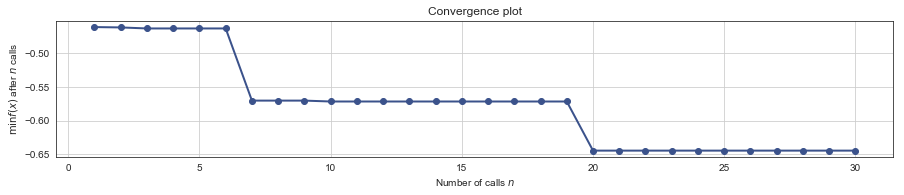

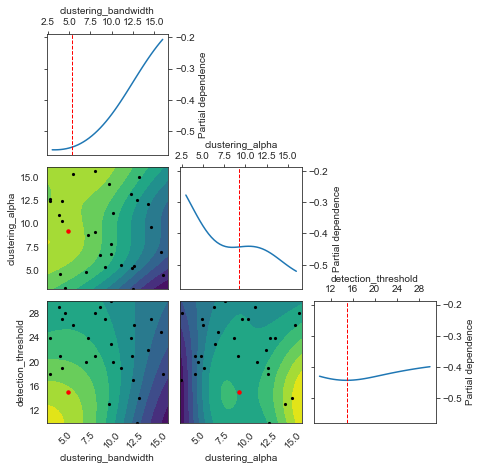

In [9]:
from skopt.plots import plot_convergence, plot_evaluations, plot_objective

plt.figure(figsize=(15,2.5))
plot_convergence(test.results_obj, ax=plt.gca());
            
parameter_names = list(test.params_to_opt.keys())
# plot_evaluations(test.results_obj, dimensions=parameter_names);
plot_objective(test.results_obj, dimensions=parameter_names);


In [14]:
test.results_obj['optimal_params']

{'clustering_bandwidth': 5.323186969826815,
 'clustering_alpha': 9.247304139605351,
 'detection_threshold': 15}

In [19]:
import spiketoolkit as st

output_folder = 'final_sorted'

sorter = 'herdingspikes'


final_parameters = {}
for i, key in enumerate(test.results_obj['optimal_params']):
    if type(test.results_obj['optimal_params']) is dict:
        final_parameters[key] = test.results_obj['optimal_params'][key]
    else:
        final_parameters[key] = test.results_obj['optimal_params'][i]


SorterClass = ss.sorter_dict[sorter]
my_sorter = SorterClass(recording=recording, output_folder = output_folder)
my_sorter.set_params(**final_parameters)
my_sorter.run()


0 clustering_bandwidth
1 clustering_alpha
2 detection_threshold
# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 32000
# Localization On
# Number of recorded channels: 100
# Analysing frames: 1920000; Seconds: 60.0
# Frames before spike in cutout: 6
# Frames after spike in cutout: 32
# tcuts: 51 77
# tInc: 100000
# Analysing frames from -51 to 100077  (0.0%)
# Analysing frames from 99949 to 200077  (5.2%)
# Analysing frames from 199949 to 300077  (10.4%)
# Analysing frames from 299949 to 400077  (15.6%)
# Analysing frames from 399949 to 500077  (20.8%)
# Analysing frames from 499949 to 600077  (26.0%)
# Analysing frames from 599949 to 700077  (31.2%)
# Analysing frames from 699949 to 800077  (36.5%)
# Analysing frames from 799949 to 900077  (41.7%)
# Analysing frames from 899949 to 1000077  (46.9%)
# Analysing frames from 999949 to 1100077  (52.1%)
# Analysing frames from 1099949 to 1200077  (57.3%)
# Analysing frames from 1199949 

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    2.8s remaining:    8.3s


Number of estimated units: 68
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/final_sorted/HS2_sorted.hdf5


[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    3.0s remaining:    0.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.1s finished


16.2992398776114

In [20]:
sorting_extractor = my_sorter.get_result()


In [21]:
sorting_extractor.get_sampling_frequency()

32000.0

In [24]:
comparison = sc.compare_sorter_to_ground_truth(sorting_true, sorting_extractor, exhaustive_gt=True)


In [26]:
# sc
results = comparison.get_performance(method='pooled_with_average', output='dict')  
results

{'accuracy': 0.7289828867329085,
 'recall': 0.7929422307735444,
 'precision': 0.7826691341542426,
 'false_discovery_rate': 0.07733086584575735,
 'miss_rate': 0.06705776922645552}

In [28]:
comparison.get_performance(method='by_unit', output='dict')  


,accuracy,recall,precision,false_discovery_rate,miss_rate
gt_unit_id,,,,,
0,0.590038,0.675439,0.823529,0.176471,0.324561
1,0.952381,0.976864,0.974359,0.025641,0.0231362
2,0.85078,0.931707,0.907363,0.0926366,0.0682927
3,0.809735,0.989189,0.816964,0.183036,0.0108108
4,0.987234,1,0.987234,0.012766,0
5,0.834615,0.92735,0.893004,0.106996,0.0726496
6,0.985185,1,0.985185,0.0148148,0
7,0.949367,0.980392,0.967742,0.0322581,0.0196078
8,0.891641,0.96,0.926045,0.073955,0.04


In [30]:
snr = st.validation.compute_snrs(sorting_true, recording)

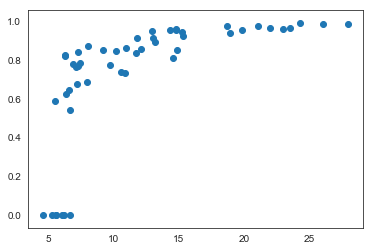

In [31]:
plt.scatter(snr, comparison.get_performance(method='by_unit', output='dict')['accuracy'])